In [32]:
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as pyl
from google.colab import files
import numpy as np

In [33]:
url="https://en.wikipedia.org/wiki/Demographics_of_Ukraine"
response= requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
wiki = soup.find_all('table', {'class': 'wikitable sortable'})
from google.colab import files
uplode= files.upload()

Saving Fertility_Rate.xlsx to Fertility_Rate (1).xlsx


In [34]:
thl=[]
headers=[]
for trol in wiki:
    for gno in trol.find_all('tr')[:1]:
        celo = gno.find_all(['td', 'th'])
        tpo = [tp.text.strip() for tp in celo]
        headers.append(tpo)

    for gnol in trol.find_all('tr')[1:]:
        cels = gnol.find_all(['td', 'th'])
        thl.append([cel.text.strip() for cel in cels])
flat_headers = [item for sublist in headers for item in sublist]


for row in thl:
    if len(row) < len(flat_headers):
        row.extend([''] * (len(flat_headers) - len(row)))
    elif len(row) > len(flat_headers):
        row = row[:len(flat_headers)]


tabele= pd.DataFrame(thl, columns=flat_headers)
file=pd.read_excel('Fertility_Rate.xlsx')
dem=pd.DataFrame(file)

print(dem)

                          regions  2011  2012  2013  2015  2017  2019  2021
0   Autonomous Republic of Crimea  1.56  1.68  1.66     _     _     _     _
1                Vinnytsia region  1.53  1.59  1.53   1.5  1.36   1.2  1.14
2                    Volyn region  1.81  1.92  1.86  1.74  1.62  1.48  1.45
3           Dnipropetrovsk region  1.44  1.52  1.51  1.48  1.29  1.11  1.03
4                  Donetsk region  1.27  1.34  1.32     _     _     _     _
5                  Fatigue region  1.65  1.71  1.68   1.6  1.42  1.23  1.14
6          Transcarpathian region  1.87  1.95  1.93  1.82  1.64  1.52     _
7               Zaporizhia region  1.37  1.46  1.43  1.39  1.25  1.09     _
8          Ivano-Frankivsk region  1.55  1.63  1.60  1.54  1.36  1.28  1.15
9                     Kyiv region  1.58  1.67  1.64  1.65  1.41  2.15  1.07
10              Kirovohrad region     _  1.61  1.57  1.49   1.3  1.12  1.04
11                 Luhansk region  1.27  1.33  1.30     _     _     _     _
12          

In [38]:
print(dem.head()[0:1])

                         regions  2011  2012  2013  2015  2017  2019  2021
0  Autonomous Republic of Crimea  1.56  1.68  1.66   NaN   NaN   NaN   NaN


In [39]:

dem.replace("_",np.nan, inplace=True)
print(dem)
print(dem.dtypes)

                          regions  2011  2012  2013  2015  2017  2019  2021
0   Autonomous Republic of Crimea  1.56  1.68  1.66   NaN   NaN   NaN   NaN
1                Vinnytsia region  1.53  1.59  1.53  1.50  1.36  1.20  1.14
2                    Volyn region  1.81  1.92  1.86  1.74  1.62  1.48  1.45
3           Dnipropetrovsk region  1.44  1.52  1.51  1.48  1.29  1.11  1.03
4                  Donetsk region  1.27  1.34  1.32   NaN   NaN   NaN   NaN
5                  Fatigue region  1.65  1.71  1.68  1.60  1.42  1.23  1.14
6          Transcarpathian region  1.87  1.95  1.93  1.82  1.64  1.52   NaN
7               Zaporizhia region  1.37  1.46  1.43  1.39  1.25  1.09   NaN
8          Ivano-Frankivsk region  1.55  1.63  1.60  1.54  1.36  1.28  1.15
9                     Kyiv region  1.58  1.67  1.64  1.65  1.41  2.15  1.07
10              Kirovohrad region   NaN  1.61  1.57  1.49  1.30  1.12  1.04
11                 Luhansk region  1.27  1.33  1.30   NaN   NaN   NaN   NaN
12          

In [40]:
value=dem.isnull().sum()
print(value)
print(dem.columns)

regions     0
2011        1
2012        0
2013        0
2015        4
2017        4
2019        4
2021       11
dtype: int64
Index(['regions', 2011, 2012, 2013, 2015, 2017, 2019, 2021], dtype='object')


In [41]:

for de in dem.columns[1:]:
    dem[de]=pd.to_numeric(dem[de], errors='coerce')
print(dem.dtypes)

regions     object
2011       float64
2012       float64
2013       float64
2015       float64
2017       float64
2019       float64
2021       float64
dtype: object


In [42]:
for de in dem.columns[1:]:
    dem[de].fillna(dem[de].mean(), inplace=True)
print(dem)

                          regions      2011  2012  2013     2015      2017  \
0   Autonomous Republic of Crimea  1.560000  1.68  1.66  1.52087  1.374783   
1                Vinnytsia region  1.530000  1.59  1.53  1.50000  1.360000   
2                    Volyn region  1.810000  1.92  1.86  1.74000  1.620000   
3           Dnipropetrovsk region  1.440000  1.52  1.51  1.48000  1.290000   
4                  Donetsk region  1.270000  1.34  1.32  1.52087  1.374783   
5                  Fatigue region  1.650000  1.71  1.68  1.60000  1.420000   
6          Transcarpathian region  1.870000  1.95  1.93  1.82000  1.640000   
7               Zaporizhia region  1.370000  1.46  1.43  1.39000  1.250000   
8          Ivano-Frankivsk region  1.550000  1.63  1.60  1.54000  1.360000   
9                     Kyiv region  1.580000  1.67  1.64  1.65000  1.410000   
10              Kirovohrad region  1.495769  1.61  1.57  1.49000  1.300000   
11                 Luhansk region  1.270000  1.33  1.30  1.52087

In [65]:

mean_dem=dem[2019].mean()

region_ukrain=dem[dem[2019]>mean_dem][['regions',2019]]
print(region_ukrain)

                   regions  2019
2             Volyn region  1.48
6   Transcarpathian region  1.52
8   Ivano-Frankivsk region  1.28
9              Kyiv region  2.15
12             Lviv region  1.26
14           Odessa region  1.33
16            Rivne region  1.53
20          Kherson region  1.27
21      Khmelnytsky region  1.26
23       Chernivtsi region  1.30
25            city of Kyiv  1.48


In [76]:
britge_dem=dem[dem[2015]== dem[2015].max()]
print(britge_dem['regions'])

16    Rivne region
Name: regions, dtype: object


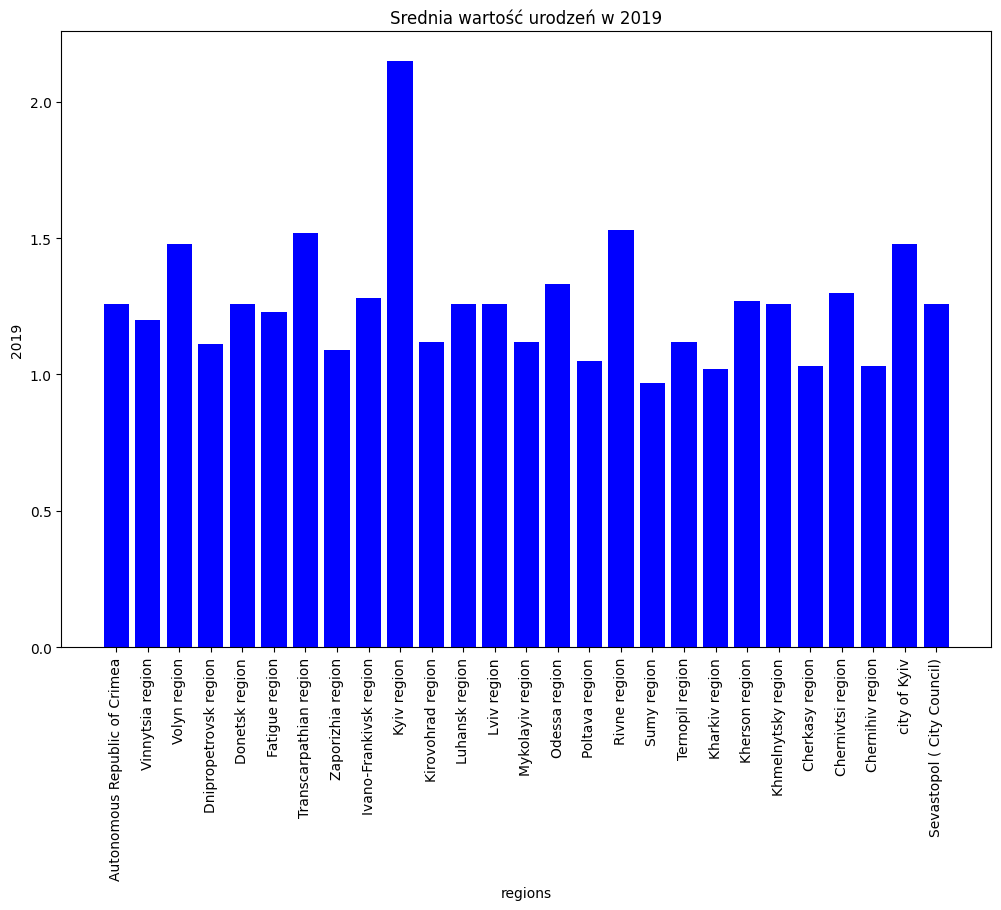

In [83]:
y=dem[2019]
x=dem['regions']
plt.figure(figsize=(12, 8))
plt.bar(x,y, color='blue')
plt.xlabel("regions")
plt.ylabel("2019")
plt.xticks(rotation=90)
plt.title("Srednia wartość urodzeń w 2019")

plt.show()